# Scanner autocheck

The autocheck process automatically validates the pattern's detection, the motor direction and also the detection of both lasers. To start, it is needed to put the pattern on the platform, in any angle.
![](https://raw.githubusercontent.com/Jesus89/3DScanScience/master/notebooks/images/4.3.%20Scanner%20autocheck/pattern-position-right.jpg)

## Capture data
In this process motor moves 360º from initial position in steps of 30º. In each step [Pattern pose](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/4.1.%20Pattern%20detection.ipynb) is found. If pattern is detected, x coordinate of normal vector is stored in a dictionary.

In [1]:
step = 30
data = {0: -0.38002540887581682, 330: 0.14435357923463937, 300: 0.61172773490478072, 30: -0.78031119549049577}

### Pattern detection

In [2]:
if len(data) == 0:
    print("Pattern not detected")

### Motor direction

In [3]:
sorted_data = {}

max_x = max(data.values())
max_i = [key for key, value in data.items() if value == max_x][0]
min_v = max_x
for i in range(max_i, max_i + 360, step):
    if i % 360 in data:
        v = data[i % 360]
        sorted_data[i] = v
        print(i, v)
        if v <= min_v:
            min_v = v
        else:
            print("Wrong motor direction")

(300, 0.6117277349047807)
(330, 0.14435357923463937)
(360, -0.3800254088758168)
(390, -0.7803111954904958)


### Move to nearest position

Once sorted the data, the nearest position of the pattern respect to the camera system can be obtained by linear regression. This position is defined by $n_x = 0$. Having the linear equation between degrees and x coordinate of normal vector it can be obtained the angle in which this condition is reached.

$$
y = m·x + c \: \rightarrow \: angle = -\frac{c}{m}
$$

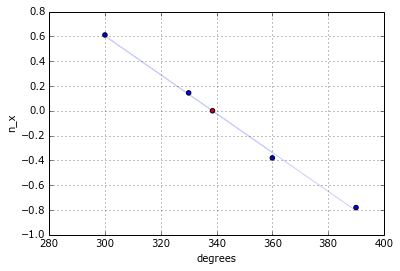

-21.4502018916


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array(list(sorted_data.keys()))
y = np.array(list(sorted_data.values()))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
angle = -c / m

# Plot linear regression
plt.plot(x, m * x + c, alpha=0.2)
plt.scatter([angle], [0], c='r')
plt.scatter(x, y)
plt.xlabel('degrees')
plt.ylabel('n_x')
plt.grid()
plt.show()

# Move motor angle by short way
if angle > 180:
    angle -= 360
print(angle)

### Laser detection

When pattern is in fron of the camera, lasers are tested using [Laser segmentation](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/3.%20Laser%20segmentation.ipynb) and [Hough Line Transformation](http://docs.opencv.org/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html). If both lasers are detected autocheck ends with success.